In [157]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sns.set()

In [158]:
df = pd.read_csv("pretrainingOutput.csv")

df["Participant ID"].unique()

array(['6109482350367148ce0aa834', '61006e8a4fe954de47730409',
       '617134f939b0aa685b96bb14', '5fd50a355025422fd25bb05b',
       '5eb3a51f58efe718f5cffdb4', '5a8d8079190420000156435d',
       '61363ce02e6022a741d63a6e', '60d1c46dcf527589711cf768',
       '5e8cb59cf38a3b057a543c1e', '5cefd79bc37f4f0018de98da',
       '5c549c6372fd9000018b5968', '60ef4432df04da6821fec20a',
       '58d0632c2fc72000011f8c57', '62976e7114308ee7c69d10ae',
       '612520bd6605794b27e6a0fd', '5e63e24eaf3bd51660031dbe',
       '5d1c9f75328d1c001af3af0f', '6171b1bc917dfe828a3130dd',
       '5adc95a1066c510001d410d7', '5d88e9d13e9a6e0001084e80',
       '5765c0fcf2e23200017ded5e', '60204458e6a42863349abc9f'],
      dtype=object)

In [159]:
# overall main question correctness rate
df[(df["Correctness"] != -1) & (~df["Question ID"].str.contains("-"))]["Correctness"].mean()

0.49173553719008267

In [160]:
#baseline main question correctness rate
df_baseline_eval = df[(df["Prompt Condition"] == 0) & (df["Correctness"] != -1) & (~df["Question ID"].str.contains("-"))]
df_baseline_eval["Correctness"].mean()

0.5314685314685315

In [161]:
#quiz group main question correctness rate
df_quiz_eval = df[(df["Prompt Condition"] == 1) & (df["Correctness"] != -1) & (~df["Question ID"].str.contains("-"))]
df_quiz_eval["Correctness"].mean()

0.43434343434343436

In [162]:
def miss_one_fn(row):
    if row["Answer Index"] == 3 and row["Correct Answer Index"] == 0 and row["Question Category"] == "share exempt":
        return 1
    else:
        return 0

baseline_miss_one = df_baseline_eval[(df_baseline_eval["Correct Answer Index"] == 0) & (df_baseline_eval["Question Category"] == "share exempt")].apply(miss_one_fn, axis=1)
print(baseline_miss_one.mean())

quiz_miss_one = df_quiz_eval[(df_quiz_eval["Correct Answer Index"] == 0) & (df_quiz_eval["Question Category"] == "share exempt")].apply(miss_one_fn, axis=1)
print(quiz_miss_one.mean())

0.0625
0.24242424242424243


In [163]:
def miss_one_fn(row):
    if row["Answer Index"] == 1 and row["Correct Answer Index"] == 2 and row["Question Category"] == "share special":
        return 1
    else:
        return 0

baseline_miss_one = df_baseline_eval[(df_baseline_eval["Correct Answer Index"] == 2) & (df_baseline_eval["Question Category"] == "share special")].apply(miss_one_fn, axis=1)
print(baseline_miss_one.mean())

quiz_miss_one = df_quiz_eval[(df_quiz_eval["Correct Answer Index"] == 2) & (df_quiz_eval["Question Category"] == "share special")].apply(miss_one_fn, axis=1)
print(quiz_miss_one.mean())

0.21739130434782608
0.5833333333333334


<AxesSubplot:xlabel='Correct Answer Index', ylabel='Probability'>

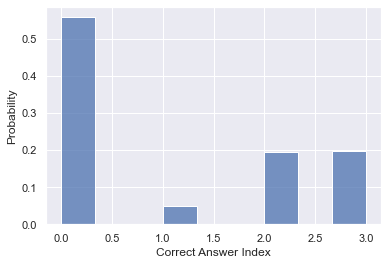

In [164]:
# correct answer index distribution
sns.histplot(df[(df["Correctness"] != -1) & (~df["Question ID"].str.contains("-"))], stat="probability", x="Correct Answer Index")

<AxesSubplot:xlabel='Answer Index', ylabel='Probability'>

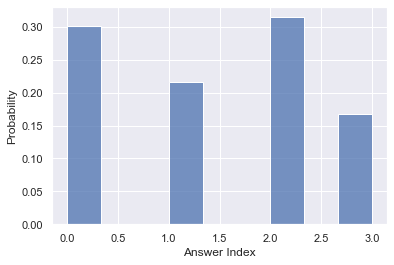

In [165]:
# baseline answer index distribution
sns.histplot(df[(df["Prompt Condition"] == 0) & (df["Correctness"] != -1) & (~df["Question ID"].str.contains("-"))], stat="probability", x="Answer Index")

<AxesSubplot:xlabel='Answer Index', ylabel='Probability'>

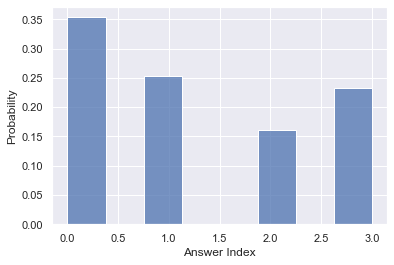

In [166]:
# quiz group answer index distribution
sns.histplot(df[(df["Prompt Condition"] == 1) & (df["Correctness"] != -1) & (~df["Question ID"].str.contains("-"))], stat="probability", x="Answer Index")


In [167]:
# Webviews
df_webview = df[df["Concept Group"] == "Webviews"]

print(df_webview[(df_webview["Prompt Condition"] == 0) & (df_webview["Correctness"] != -1)]["Correctness"].mean())
print(df_webview[(df_webview["Prompt Condition"] == 1) & (df_webview["Correctness"] != -1) & (~df_webview["Question ID"].str.contains("-"))]["Correctness"].mean())

0.5666666666666667
0.42105263157894735


In [168]:
# Service Providers
df_concept = df[df["Concept Group"] == "Service Providers"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.4444444444444444
0.6153846153846154


In [169]:
# Optional Data Collection
df_concept = df[df["Concept Group"] == "Optional Data Collection"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.375
0.6666666666666666


In [170]:
# Anonymization
df_concept = df[df["Concept Group"] == "Anonymization"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.0
0.5


In [171]:
# Legal Request
df_concept = df[df["Concept Group"] == "Legal Request"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.4
0.25


In [172]:
# User Consent
df_concept = df[df["Concept Group"] == "User Consent"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.07692307692307693
0.1


In [173]:
# Share Basic
df_concept = df[df["Concept Group"] == "Share Basic"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.5
0.5


In [174]:
# Collect Basic
df_concept = df[df["Concept Group"] == "Collect Basic"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.8571428571428571
0.75


In [175]:
# Off-device Server Transfers
df_concept = df[df["Concept Group"] == "Off-device Server Transfers"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.8571428571428571
0.5


In [176]:
# On-device processing and transfers
df_concept = df[df["Concept Group"] == "On-device processing and transfers"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.6666666666666666
0.2727272727272727


In [177]:
# Libraries/SDKs
df_concept = df[df["Concept Group"] == "Libraries/SDKs"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.625
0.375


In [178]:
# End to End Encryption
df_concept = df[df["Concept Group"] == "End to End Encryption"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.5555555555555556
1.0


In [179]:
# Ephemeral Processing
df_concept = df[df["Concept Group"] == "Ephemeral Processing"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.5
0.3333333333333333


In [180]:
# Pseudynoymization
df_concept = df[df["Concept Group"] == "Pseudynoymization"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.875
0.5
